<a href="https://colab.research.google.com/github/hiauls/Machinelearningpraktikum/blob/main/!_Kelompok_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KLASIFIKASI SEPATU ADIDAS DAN NIKE MENGGUNAKAN CONVOLUTIONAL NEURAL NETWORK (CNN)

***Title :***
  _KLASIFIKASI SEPATU ADIDAS DAN NIKE MENGGUNAKAN CONVOLUTIONAL NEURAL NETWORK (CNN)_

***Member Name :***
  1. Iqmah Nurrizky A
  2. Aulia Lintang Ayu K.
  
***Dataset :***
  Rose Flowers Dataset
  
***Dataset Link :***
  [Rose Flowers Dataset](https://www.kaggle.com/datasets/ifeanyinneji/nike-adidas-shoes-for-image-classification-dataset)

***Jurnal Referensi :***
  [Jurnal Referensi](https://ibn.e-journal.id/index.php/ESENSI/article/view/67/55)

## **LOAD DATASET & PRE - PROCESSING**

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/MyDrive/MachineLearning"

/content/gdrive/MyDrive/MachineLearning


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/MachineLearning"

In [ ]:
!kaggle datasets download -d ifeanyinneji/nike-adidas-shoes-for-image-classification-dataset

 55% 14.0M/25.7M [00:00<00:00, 142MB/s]
100% 25.7M/25.7M [00:00<00:00, 168MB/s]


In [ ]:
!unzip "/content/gdrive/MyDrive/MachineLearning/nike-adidas-shoes-for-image-classification-dataset.zip"

Archive:  /content/gdrive/MyDrive/MachineLearning/Images/nike-adidas-shoes-for-image-classification-dataset.zip
  inflating: labelnames.csv          
  inflating: test/adidas/Adidas (18).jpg  
  inflating: test/adidas/Adidas (19).jpg  
  inflating: test/adidas/Adidas (20).jpg  
  inflating: test/adidas/Adidas (21).JPG  
  inflating: test/adidas/Adidas (22).jpg  
  inflating: test/adidas/Adidas (23).jpg  
  inflating: test/adidas/Adidas (24).jpg  
  inflating: test/adidas/Adidas (25).jpg  
  inflating: test/adidas/Adidas (26).jpg  
  inflating: test/adidas/Adidas (27).jpg  
  inflating: test/adidas/aadidas_ (10).jpg  
  inflating: test/adidas/aadidas_ (11).jpg  
  inflating: test/adidas/aadidas_ (12).jpg  
  inflating: test/adidas/aadidas_ (13).jpg  
  inflating: test/adidas/aadidas_ (14).jpg  
  inflating: test/adidas/aadidas_ (15).jpg  
  inflating: test/adidas/aadidas_ (16).jpg  
  inflating: test/adidas/aadidas_ (17).jpg  
  inflating: test/adidas/aadidas_ (18).jpg  
  inflating: te

In [3]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import zipfile
import shutil
import splitfolders
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelEncoder

In [5]:
import os
base_dataset = "/content/gdrive/MyDrive/MachineLearning/test"
class_dir = ['adidas', 'nike']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".jpg"):
      os.remove(os.path.join(cur_dir, item))

In [ ]:
!mkdir "/content/gdrive/MyDrive/MachineLearning/shoes/"
!mkdir "/content/gdrive/MyDrive/MachineLearning/shoes/adidas"
!mkdir "/content/gdrive/MyDrive/MachineLearning/shoes/nike"
!mkdir "/content/gdrive/MyDrive/MachineLearning/splitt"

In [9]:
adidas_images = "/content/gdrive/MyDrive/MachineLearning/shoes/adidas"
nike_images = "/content/gdrive/MyDrive/MachineLearning/shoes/nike"

test_adidas_dir = "/content/gdrive/MyDrive/MachineLearning/test/adidas"
train_adidas_dir = "/content/gdrive/MyDrive/MachineLearning/train/adidas"
val_adidas_dir = "/content/gdrive/MyDrive/MachineLearning/validation/adidas"

test_nike_dir = "/content/gdrive/MyDrive/MachineLearning/test/nike"
train_nike_dir = "/content/gdrive/MyDrive/MachineLearning/train/nike"
val_nike_dir = "/content/gdrive/MyDrive/MachineLearning/validation/nike"

**ADIDAS**

In [10]:
temp_test_adidas = os.listdir(test_adidas_dir)
temp_train_adidas = os.listdir(train_adidas_dir)
temp_val_adidas = os.listdir(val_adidas_dir)

for file in temp_test_adidas:
  new_path = shutil.move(f"{test_adidas_dir}/{file}", adidas_images)

for file in temp_train_adidas:
  new_path = shutil.move(f"{train_adidas_dir}/{file}", adidas_images)

for file in temp_val_adidas:
  new_path = shutil.move(f"{val_adidas_dir}/{file}", adidas_images)

**NIKE**

In [11]:
temp_test_nike = os.listdir(test_nike_dir)
temp_train_nike = os.listdir(train_nike_dir)
temp_val_nike = os.listdir(val_nike_dir)

for file in temp_test_nike:
  new_path = shutil.move(f"{test_nike_dir}/{file}", nike_images)

for file in temp_train_nike:
  new_path = shutil.move(f"{train_nike_dir}/{file}", nike_images)

for file in temp_val_nike:
  new_path = shutil.move(f"{val_nike_dir}/{file}", nike_images)

In [12]:
print("Total Image Adidas", len(os.listdir(adidas_images)))
print("Total Image Adidas", len(os.listdir(nike_images)))

Total Image Adidas 286
Total Image Adidas 288


In [14]:
data_dir = "/content/gdrive/MyDrive/MachineLearning/shoes/"
output = "/content/gdrive/MyDrive/MachineLearning/splitt"
splitfolders.ratio(data_dir, output=output, seed=1337, ratio=(0.7, 0.3))

Copying files: 574 files [00:10, 52.47 files/s]


In [15]:
train_dir = "/content/gdrive/MyDrive/MachineLearning/splitt/train"
val_dir = "/content/gdrive/MyDrive/MachineLearning/splitt/val"

**GATHER**

In [16]:
trainX = []
trainY = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            trainX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            trainY.append(label)

trainX = np.array(trainX)
trainY = np.array(trainY)

In [17]:
valX = []
valY = []
for r, d, f in os.walk(val_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            valX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            valY.append(label)

valX = np.array(valX)
valY = np.array(valY)

In [18]:
print("Train Data=", trainX.shape)
print("Train Label=", trainY.shape)
print("Validation Data=", valX.shape)
print("Validation Label=", valY.shape)

Train Data= (387, 150, 150, 3)
Train Label= (387,)
Validation Data= (165, 150, 150, 3)
Validation Label= (165,)


In [20]:
train_adidas = "/content/gdrive/MyDrive/MachineLearning/splitt/train/adidas"
val_adidas = "/content/gdrive/MyDrive/MachineLearning/splitt/val/adidas"
train_nike = "/content/gdrive/MyDrive/MachineLearning/splitt/train/nike"
val_nike = "/content/gdrive/MyDrive/MachineLearning/splitt/val/nike"

print('total adidas train data:', len(os.listdir(train_adidas)))
print('total adidas valdation data:', len(os.listdir(val_adidas)))
print('total nike train data:', len(os.listdir(train_nike)))
print('total nike valdation data:', len(os.listdir(val_nike)))

total adidas train data: 200
total adidas valdation data: 86
total nike train data: 201
total nike valdation data: 87


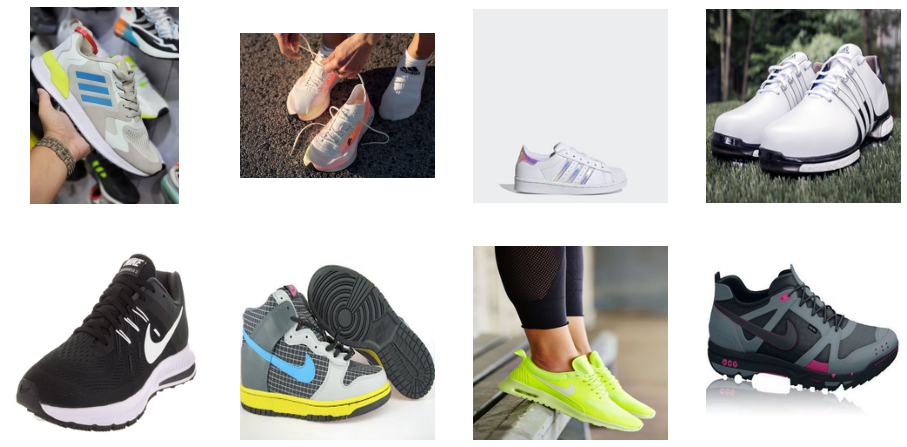

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 4
adidas_pix = [os.path.join(train_adidas, fname) 
                for fname in os.listdir(train_adidas)[pic_index-4:pic_index]]
nike_pix = [os.path.join(train_nike, fname) 
                for fname in os.listdir(train_nike)[pic_index-4:pic_index]]

for i, img_path in enumerate(adidas_pix+nike_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()



---



## **MODELING**